In [314]:
# importing libraries
import os
import re
import codecs
import matplotlib.pyplot as plt
import collections
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

%matplotlib inline

In [315]:
BASE_DIR = 'data'
DATA_DIR = codecs.open(os.path.join(BASE_DIR, 'data.txt'), 'rb', encoding='utf-8').readlines()
COMMON_DIR = codecs.open(os.path.join(BASE_DIR, 'google_10000.txt'), 'rb', encoding='utf-8').readlines()
true_data = pd.read_csv(os.path.join(BASE_DIR, 'true_glossary.csv'), sep='\t')

In [316]:
true_data_lst = true_data.iloc[:, 0].tolist()

In [329]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
punctuation = "'!()-[]{};:'\,<>./?@#$%^&*_~"

def expand_contractions(data_str):
    specials = ["’", "‘", "´", "`", "’"]
    for s in specials:
        data_str = data_str.replace(s, "'")
    data_str = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in data_str.split(" ")])
    return data_str

def extra_spaces(data_str):
    return re.sub(r'\s{1,}', ' ', data_str)

def punctuations(data_str):
    data_str = data_str.replace("'s", "")
    for x in data_str.lower():
        if x in punctuation: 
            data_str = data_str.replace(x, "")
    return data_str

def preprocess(data_str):
    data_str = expand_contractions(data_str)
    data_str = punctuations(data_str)
    data_str = extra_spaces(data_str)
    return data_str

def precision(pred, actual):
    N = [i for i in pred if i in actual]
    _D = [i for i in pred if i not in actual]
    return len(N) / (len(N)+len(_D)), N, _D

def recall(pred, actual):
    N = [i for i in pred if i in actual]
    _D = [i for i in actual if i not in pred]
    return len(N) / (len(N)+len(_D)), N, _D

def f1score(precision, recall):
    return (2*precision*recall) / (precision + recall)

data = preprocess(' '.join([i.lower().strip() for i in DATA_DIR if len(i.strip())> 2]))

In [330]:
# np_chunks = set()
# doc = nlp(data)
# for chunk in doc.noun_chunks:
#     np_chunks.add(chunk.text)
np_chunks = set(nltk.word_tokenize(data))

In [331]:
len(np_chunks)

6258

In [332]:
prec, TP, FP = precision(np_chunks, true_data_lst)
rec, TP, FN = recall(np_chunks, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")

Precision = 0.011505273250239693
Recall = 0.7058823529411765
TP=72, FP=6186, FN=30


In [339]:
common = [i.strip() for i in COMMON_DIR]

def remove_google_common(np_chunks):
    keep, remove = [], []
    for i in np_chunks:
        if i not in common:
            keep.append(i)
        else:
            remove.append(i)
            
    return keep, remove

data_common_removed, common_removed = remove_google_common(np_chunks)

In [340]:
len(data_common_removed), len(common_removed)

(3478, 2780)

In [342]:
prec, TP, FP = precision(data_common_removed, true_data_lst)
rec, TP, FN = recall(data_common_removed, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")

Precision = 0.019551466359977
Recall = 0.6666666666666666
TP=68, FP=3410, FN=34


3410

In [345]:
ner_chunks = set()
ner_chunks_cat = set()
doc = nlp(data)
for ent in doc.ents:
    ner_chunks.add(ent.text)
    ner_chunks_cat.add(ent.label_)

In [346]:
def remove_ner(np_chunks):
    keep, remove = [], []
    for i in np_chunks:
        if i not in ner_chunks:
            keep.append(i)
        else:
            remove.append(i)
    return keep, remove

data_ner_removed, ner_removed = remove_ner(data_common_removed)

In [347]:
len(data_ner_removed), len(ner_removed)

(3118, 360)

In [348]:
prec, TP, FP = precision(data_ner_removed, true_data_lst)
rec, TP, FN = recall(data_ner_removed, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"TP={len(TP)}, FP={len(FP)}, FN={len(FN)}")

Precision = 0.021808851828094934
Recall = 0.6666666666666666
TP=68, FP=3050, FN=34


In [310]:
wc = dict(collections.Counter(nltk.word_tokenize(data)))
wc_len = {k: len(k) for k, v in wc.items()}
wc_len = dict(sorted(wc_len.items(), key=lambda k: k[1], reverse=True))

def remove_high_low_len(np_chunks):
    keep, remove = [], []
    for i in np_chunks:
        if i in wc_len:
            if wc_len[i] >= 4 and wc_len[i] < 12:
                keep.append(i)
            else:
                remove.append(i)
        else:
            keep.append(i)
    return keep, remove

data_len_removed, len_removed = remove_high_low_len(data_common_removed)

In [311]:
len(data_len_removed), len(len_removed)

(2973, 505)

In [312]:
prec, TP, FP = precision(data_len_removed, true_data_lst)
rec, TP, FN = recall(data_len_removed, true_data_lst)

print (f"Precision = {prec}")
print (f"Recall = {rec}")
print (f"TP={TP}, FP={FP}, FN={FN}")

Precision = 0.02186343760511268
Recall = 0.6372549019607843
TP=65, FP=2908, FN=37


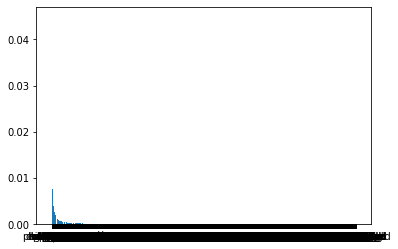

In [265]:
plt.bar(range(len(wc_freq)), list(wc_freq.values()), align='center')
plt.xticks(range(len(wc_freq)), list(wc_freq.keys()))

plt.show()

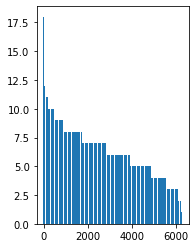

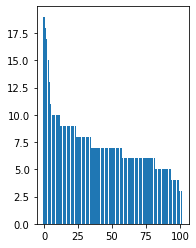

In [274]:
wc = dict(collections.Counter(nltk.word_tokenize(data)))
wc_len = {k: len(k) for k, v in wc.items()}
wc_len = dict(sorted(wc_len.items(), key=lambda k: k[1], reverse=True))

true_len = {i: len(i) for i in true_data_lst}
true_len = dict(sorted(true_len.items(), key=lambda k: k[1], reverse=True))


In [ ]:

plt.subplot(1, 2, 1)
plt.bar(range(len(wc_len)), list(wc_len.values()), align='center')
plt.show()

plt.subplot(1, 2, 2)
plt.bar(range(len(true_len)), list(true_len.values()), align='center')
plt.show()

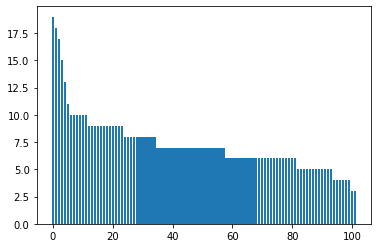

In [272]:


plt.bar(range(len(true_len)), list(true_len.values()), align='center')
plt.show()

In [338]:
TP

['gangling',
 'pliable',
 'trifle',
 'knobbly',
 'pasty',
 'seeker',
 'remembrall',
 'alchemy',
 'bludger',
 'snitch',
 'quaffle',
 'biased',
 'gryffindor',
 'phoenix',
 'fixedly',
 'tripe',
 'mangled',
 'kip',
 'abysmal',
 'chaser',
 'galoshes',
 'galleon',
 'herbology',
 'marmalade',
 'hogwarts',
 'flimsy',
 'sickle',
 'fanatic',
 'limp',
 'treacle',
 'muggle',
 'slytherin',
 'monkshood',
 'ravenclaw',
 'whelk',
 'berserk',
 'spasm',
 'riffraff',
 'bezoar',
 'pewter',
 'spindly',
 'beater',
 'ruffled',
 'ornate',
 'pub',
 'gringotts',
 'centaur',
 'rigid',
 'feeble',
 'stalactite',
 'prefect',
 'hufflepuff',
 'wolfsbane',
 'stoat',
 'diversion',
 'quidditch',
 'tuft',
 'contrary',
 'keeper',
 'askew',
 'disgruntled',
 'knickerbocker',
 'luminous',
 'tawny',
 'stalagmite',
 'gibber',
 'toil',
 'mystified',
 'rickety',
 'tyke',
 'hygienic',
 'transfiguration']

In [136]:
import nltk
from nltk.corpus import PlaintextCorpusReader

tokens = nltk.word_tokenize(data)
text = nltk.Text(tokens)

In [244]:
text.concordance("ickle")

Displaying 5 of 5 matches:
aid she could not believe it was her ickle dudleykins he looked so handsome and
geroff ” he wriggled free “ aaah has ickle ronnie got somefink on his nosie ” s
ny and look after ron ” “ dont worry ickle ronniekins is safe with us ” “ shut 
oooh ” he said with an evil cackle “ ickle firsties what fun ” he swooped sudde
ckled “ wandering around at midnight ickle firsties tut tut tut naughty naughty
